In [1]:

import glob
import operator
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from ipywidgets import interact, Output
from ordered_set import OrderedSet

from plotting_utils import get_results, Result
from typing import List

# %matplotlib inline
mpl.rcParams['figure.dpi'] = 150

In [2]:
def plot_results(results: List[Result], name: str, log: bool=False) -> None:
    """
    Plots a heatmap of vevd vs mdpp for a given branch in a file's metadata tree e.g. fiducial xsec

    Args:
        results (List[Result]): A list of `Result` objects 
        name (str): Name of the metadata branch to plot
        log (bool, optional): Use a log scale for colour bar. Defaults to False.
    """

    vevds = OrderedSet([r.vevd for r in sorted(results, key=operator.attrgetter('vevd'), reverse=True)])
    mdpps = OrderedSet([r.mdpp for r in sorted(results, key=operator.attrgetter('mdpp'))])

    print(mdpps)

    hmap = []
    
    print(vevds)

    for v in vevds:
        results_msorted = sorted(results, key=operator.attrgetter('mdpp'))
        hmap.append([r.quantity for r in results_msorted if r.vevd == v])
        
    hmap = np.array(hmap, dtype=float)

    # hmap = hmap.astype(object)
    np.nan_to_num(hmap)
    print(hmap)    
    # hmap = hmap.astype('float32')
    
    if "_xs" in name:
        hmap *= 1000

    fig, ax = plt.subplots()
    if log:
        sns.heatmap(hmap, annot=True, cmap="Oranges", ax=ax, #xaticklabels=mdpps, yticklabels=vevds, ax=ax,
                    fmt=".2", norm=LogNorm(), annot_kws={"size": 15 / np.sqrt(len(hmap))},
                    cbar_kws={'label': name});
    if not log:
        sns.heatmap(hmap, annot=True, cmap="Oranges", ax=ax,
                    annot_kws={"size": 15 / np.sqrt(len(hmap))},
                    cbar_kws={'label': name});
    
    ax.set_xticklabels(mdpps)
    ax.set_yticklabels(vevds)
    ax.set_xlabel(r"$M_{\Delta^{\pm\pm}}$ [GeV]");
    ax.set_ylabel(r"vevD [GeV]");
    plt.show()



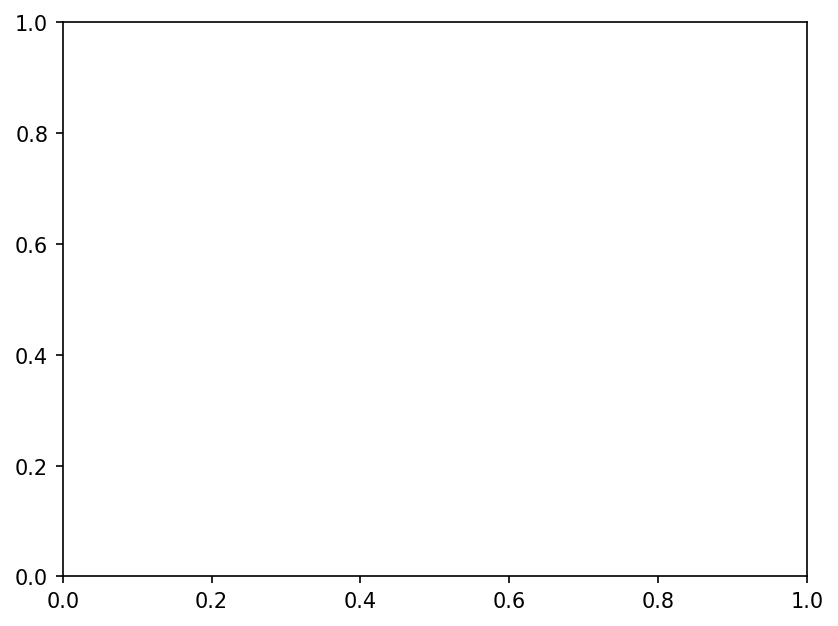

interactive(children=(Dropdown(description='sample_folder', options=('/data/bewilson/generate_output/TypeII_nl…

Error in callback <function _draw_all_if_interactive at 0x7f336462f4c0> (for post_execute):


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 960x720 with 2 Axes>

In [6]:
def select(sample_folder: str, variable: str, log: bool) -> None:
    """
    Simple dropdown menu widget to select the sample folder and metadata branch to plot

    Args:
        sample_folder (str): Folder containing the multirun output
        variable (str): A branch in output.root/metadata
        log (bool): If True, use log scale for plot
    """
    results = get_results(sample_folder, variable)
    plot_results(results, variable, log)

# runs = glob.glob("../multirun/*")
runs = glob.glob("/data/bewilson/generate_output/*")
choices = ["total_xs", "total_xs_error", "sum_of_weights", "sum_of_weights_err", "fid_sum_of_weights", "fid_sum_of_weights_err", "fid_xs", "fid_xs_err", "nsurvive_events", "ninit_events",  "presel_eff",   "cutflow"]

interact(select, sample_folder=runs, variable=choices, log=[True, False]);